In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df = df[df['MSRP'] <= 100000]
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.shape

(11276, 16)

In [5]:
# lower case column names and remove spaces between them
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
# lower case column values
for col in df.columns[df.dtypes == 'object']:
    df[col] = df[col].str.lower()

df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1 series m,2011,premium unleaded (required),335.0,6.0,manual,rear wheel drive,2.0,"factory tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [7]:
for col in df.columns:
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print('')


['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
40

['1 series m' '1 series' '100' '124 spider' '190-class']
821

[2011 2012 2013 1992 1993]
28

['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/e85)' 'diesel']
10

[335. 300. 230. 320. 172.]
295

[6. 4. 5. 8. 0.]
8

['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']
4

[ 2.  4.  3. nan]
3

['factory tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
62

['compact' 'midsize' 'large']
3

['coupe' 'convertible' 'sedan' 'wagon' '4dr hatchback']
16

[26 28 27 25 24]
57

[19 20 18 17 16]
62

[3916 3105  819  617 1013]
40

[46135 40650 36350 29450 34500]
5540



## 2.4 Split the dataset

In [8]:
# Splitting the dataframe
df_train = df.sample(frac=0.6, random_state=42)  # 60% for training
remaining_df = df.drop(df_train.index)  # Remaining 40%

# From the remaining 40%, we split into 20% validation and 20% testing
df_val = remaining_df.sample(frac=0.5, random_state=42)  # 50% of remaining 40% = 20% of original data
df_test = remaining_df.drop(df_val.index)  # The rest for testing

print(df_train.shape, df_val.shape, df_test.shape)


(6766, 16) (2255, 16) (2255, 16)


Text(0, 0.5, 'b')

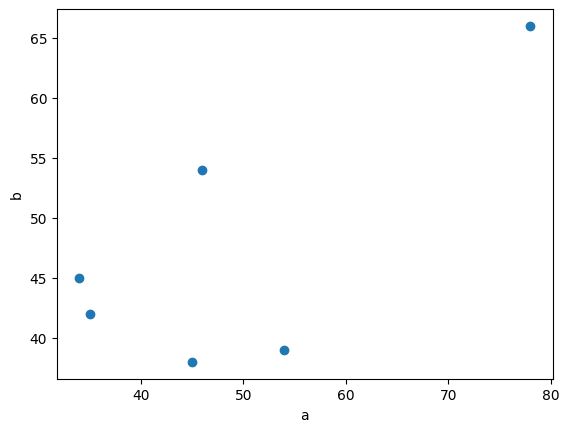

In [9]:
a= np.array([35,46,45,54,34,78])
b = np.array([42,54,38,39,45,66])

plt.scatter(a,b);
plt.xlabel('a')
plt.ylabel('b')

In [10]:
a_mean = np.mean(a)
b_mean = np.mean(a)

a_var = np.var(a)
b_var = np.var(b)

ab_cov = np.cov(a,b)
print(ab_cov)

[[262.26666667 125.33333333]
 [125.33333333 116.66666667]]


## 2.5 Foundational linear regression

In [11]:
xi = [453,22,32]
w0 = 7
w = [1,1,1]
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred +w[j]*xi[j]
    return pred

linear_regression(xi)


514

## 2.6 linear regression vector form

In [12]:
def dot_product(xi, w):
    result = 0.0

    for j in range(len(xi)):
        result = result + xi[j]*w[j]
    return result

In [13]:
xi = [2,4,8]
w0 = 2
w = [1,1,1]
def linear_regression(xi):
    pred = w0 + dot_product(xi,w) # np.dot(xi,w)
    return pred

linear_regression(xi)

16.0

In [14]:
xi = [2,4,8]
w0 = 2
w = [1,1,1]

w_new = [w0] + w
w_new

[2, 1, 1, 1]

In [15]:
def linear_regression(xi):
    xi = [1] + xi  # 1 will be added to xi
    return dot_product(xi, w_new) # 1 will be multiplied with w0

linear_regression(xi)

16.0

In [16]:
x1 = [1,15,66,78]
x2 = [1,132,45,67]
x3 = [1,67,9,88]

X = [x1,x2,x3]
X = np.array(X)
print(X,'\n')

w = [1,1,1]
w0 = [3]
w_new = w0+w
print(w_new)

[[  1  15  66  78]
 [  1 132  45  67]
 [  1  67   9  88]] 

[3, 1, 1, 1]


In [17]:
def linear_regression(X):
    return np.dot(X,w_new)

# predictions for 3 cars
linear_regression(X)

array([162, 247, 167])

## 2.7 Training linear regression model

w = (XtX)-1 * Xt * y

In [18]:
import numpy as np

# Defining the input matrix
x1 = [19, 15, 66, 78]
x2 = [81, 132, 45, 67]
x3 = [14, 67, 9, 88]
x4 = [2, 45, 67, 88]
x5 = [12, 66, 77, 88]
x6 = [42, 45, 67, 78]
X = np.array([x1, x2, x3, x4, x5, x6])

print('X \n', X, '\n')

# Adding a bias term in X (column of ones for intercept)
bias = np.ones(X.shape[0])
X_bias = np.column_stack([bias, X])
print('X_bias \n', X_bias)

# Transpose of X_bias
Xt = np.transpose(X_bias)
print('Xt \n', Xt)

# Calculate XtX using X_bias
XtX = np.dot(Xt, X_bias)
print('XtX \n', XtX)

# Check if XtX is square
print('XtX shape: ', XtX.shape)

# Compute inverse of XtX (it must be square)
try:
    XtX_inv = np.linalg.inv(XtX)
    print('XtX_inv \n', XtX_inv)
except np.linalg.LinAlgError:
    print('XtX is not invertible, possibly due to being singular.')

# Target values
y = np.array([23, 45, 66, 88, 99, 77])  # y should have the same length as the number of rows in X
XtY = np.dot(Xt, y)

# Check if XtX_inv exists before multiplication
if 'XtX_inv' in locals():
    XtX_inv_y = XtX_inv.dot(XtY).round(2)
    print('XtX_inv_y \n', XtX_inv_y)
else:
    print('XtX_inv is not defined, cannot compute XtX_inv_y.')


X 
 [[ 19  15  66  78]
 [ 81 132  45  67]
 [ 14  67   9  88]
 [  2  45  67  88]
 [ 12  66  77  88]
 [ 42  45  67  78]] 

X_bias 
 [[  1.  19.  15.  66.  78.]
 [  1.  81. 132.  45.  67.]
 [  1.  14.  67.   9.  88.]
 [  1.   2.  45.  67.  88.]
 [  1.  12.  66.  77.  88.]
 [  1.  42.  45.  67.  78.]]
Xt 
 [[  1.   1.   1.   1.   1.   1.]
 [ 19.  81.  14.   2.  12.  42.]
 [ 15. 132.  67.  45.  66.  45.]
 [ 66.  45.   9.  67.  77.  67.]
 [ 78.  67.  88.  88.  88.  78.]]
XtX 
 [[6.0000e+00 1.7000e+02 3.7000e+02 3.3100e+02 4.8700e+02]
 [1.7000e+02 9.0300e+03 1.4687e+04 8.8970e+03 1.2649e+04]
 [3.7000e+02 1.4687e+04 3.0544e+04 1.8645e+04 2.9188e+04]
 [3.3100e+02 8.8970e+03 1.8645e+04 2.1369e+04 2.6853e+04]
 [4.8700e+02 1.2649e+04 2.9188e+04 2.6853e+04 3.9889e+04]]
XtX shape:  (5, 5)
XtX_inv 
 [[ 3.64911472e+02 -1.46979720e+00  3.17898690e-01 -8.23023205e-02
  -4.16629108e+00]
 [-1.46979720e+00  6.58293149e-03 -1.69456222e-03  1.28289906e-04
   1.70106959e-02]
 [ 3.17898690e-01 -1.69456222e-03 

In [19]:
def linear_regression(X):
    bias = np.ones(X.shape[0])
    X_bias = np.column_stack([bias,X])
    y = [440,990,200,564,582,467]
    Xt =  np.transpose(X_bias)
    XtX = np.dot(Xt,X_bias)
    XtX_inv = np.linalg.inv(XtX)
    w = XtX_inv.dot(Xt).dot(y)
    return w

linear_regression(X)

array([3085.71414019,  -10.80663848,    7.73099249,    5.89888692,
        -37.46849095])

## 2.8 - Baseline Model for Car Price Prediction Project

In [20]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3337,oldsmobile,cutlass,1999,regular unleaded,150.0,6.0,automatic,front wheel drive,4.0,NaN,midsize,sedan,26,17,26,2045
1006,volvo,960,1997,regular unleaded,181.0,6.0,automatic,rear wheel drive,4.0,luxury,midsize,wagon,24,16,870,2000
7136,mazda,navajo,1992,regular unleaded,155.0,6.0,manual,rear wheel drive,2.0,NaN,compact,2dr suv,20,15,586,2000
4996,nissan,frontier,2016,regular unleaded,152.0,4.0,automatic,rear wheel drive,4.0,NaN,compact,extended cab pickup,23,17,2009,20960
2763,chevrolet,colorado,2012,regular unleaded,242.0,5.0,automatic,rear wheel drive,4.0,NaN,compact,crew cab pickup,23,17,1385,27490


In [21]:
df_train.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        1
engine_hp              41
engine_cylinders       17
transmission_type       0
driven_wheels           0
number_of_doors         3
market_category      2267
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [22]:
df_train.fillna(0, inplace= True)

In [23]:
df_train.isna().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [24]:
num_cols = df_train.columns[df_train.dtypes != 'object']
df_train_num = df_train[num_cols]
df_train_num

X_train = df_train_num.drop(['msrp'], axis = 1).values
y_train = df_train_num['msrp'].values


In [25]:
X_train.shape

(6766, 7)

In [26]:
y_train.shape

(6766,)

In [27]:
def add_bias(X):
    bias = np.ones(X.shape[0])
    X = np.column_stack([bias,X])
    return X

def linear_regression_model(X,y):
    Xt =  np.transpose(X)
    XtX = np.dot(Xt,X)
    XtX_inv = np.linalg.inv(XtX)
    w = XtX_inv.dot(Xt).dot(y)
    w0 = w[0]
    return w,w0

X_train_data = add_bias(X_train)
w,w0 = linear_regression_model(X_train_data,y_train)
print(X_train_data.shape)
print(w0)
print(w)

(6766, 8)
-1726721.6463633222
[-1.72672165e+06  8.55326504e+02  1.38609652e+02  1.63578416e+00
  1.33563366e+02  4.12600113e+01  2.46073965e+02 -5.95434709e-01]


In [28]:
y_pred = np.dot(X_train_data,w)

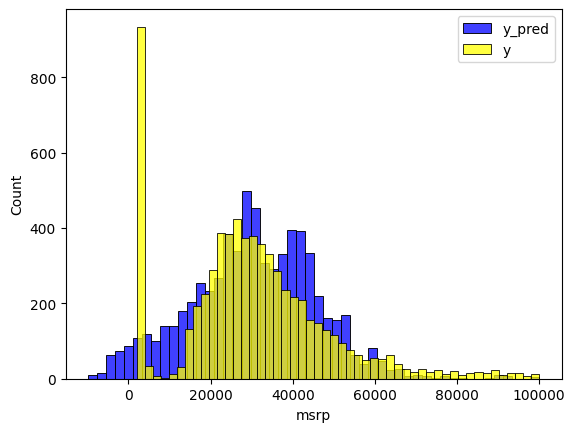

In [29]:
import seaborn as sns
sns.histplot(y_pred, bins = 50, color='blue', label='y_pred')
sns.histplot(y_train, bins = 50, color='yellow', label='y')
plt.xlabel('msrp')
plt.legend()
plt.show()



## 2.9 RMSE

In [30]:
print(np.isnan(y_pred).sum())
print(np.isnan(y_train).sum())

0
0


In [31]:
def rmse(y_pred,y):
    rmse = np.sqrt(np.mean((y_pred - y) ** 2))
    return rmse.round(2)

print(rmse(y_pred,y_train))

10011.9


## 2.10 Computing RMSE on validation set

In [32]:
print(df_train.shape)

(6766, 16)


In [33]:
df_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
5134,infiniti,g35,2006,regular unleaded,298.0,6.0,manual,rear wheel drive,4.0,"luxury,high-performance",midsize,sedan,24,17,190,31200
1572,chevrolet,avalanche,2010,flex-fuel (unleaded/e85),320.0,8.0,automatic,rear wheel drive,4.0,"crossover,flex fuel",large,crew cab pickup,21,15,1385,35725
409,mazda,3,2017,regular unleaded,184.0,4.0,manual,front wheel drive,4.0,"hatchback,performance",compact,4dr hatchback,33,25,586,22395
768,audi,80,1991,regular unleaded,130.0,5.0,manual,front wheel drive,4.0,luxury,compact,sedan,24,18,3105,2000
1548,cadillac,ats,2016,premium unleaded (recommended),272.0,4.0,automatic,rear wheel drive,4.0,"luxury,performance",midsize,sedan,31,22,1624,43155


In [34]:
def preprae_X_y(df):
    X = df.select_dtypes(exclude=['object'])
    X.drop('msrp',axis =1, inplace = True)
    X = X.fillna(0).values
    y = df['msrp'].values
    return X,y

def rmse(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true) ** 2))


In [35]:
X_val_train,y_val = preprae_X_y(df_val)
X_val_train_data = add_bias(X_val_train)
y_pred = np.dot(X_val_train_data,w)
rmse(y_pred,y_val)


10190.67741581294

## 2.11 Simple feature engineering

In [36]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1 series m,2011,premium unleaded (required),335.0,6.0,manual,rear wheel drive,2.0,"factory tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [37]:
print(df.year.max())
print(df.year.min())

2017
1990


In [38]:
df['car_age'] = 2017 - df['year']
df_new = df.drop('year',axis = 1)
df_new.head()


,make,model,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,car_age
0,bmw,1 series m,premium unleaded (required),335.0,6.0,manual,rear wheel drive,2.0,"factory tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,6
1,bmw,1 series,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650,6
2,bmw,1 series,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350,6
3,bmw,1 series,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450,6
4,bmw,1 series,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,luxury,compact,convertible,28,18,3916,34500,6


In [39]:
def split_dataframe(df):
    df_train = df.sample(frac=0.6, random_state=42)
    remaining_df = df.drop(df_train.index)

    df_val = remaining_df.sample(frac=0.5, random_state=42)
    df_test = remaining_df.drop(df_val.index)

    return df_train, df_val, df_test


df_train,df_val,df_test = split_dataframe(df_new)
print(f"Train shape: {df_train.shape}, Validation shape: {df_val.shape}, Test shape: {df_test.shape}")


Train shape: (6766, 16), Validation shape: (2255, 16), Test shape: (2255, 16)


In [40]:
def preprae_X_y(df):
    X = df.select_dtypes(exclude=['object'])
    X.drop('msrp',axis =1, inplace = True)
    X = X.fillna(0).values
    y = df['msrp'].values
    return X,y

def add_bias(X):
    bias = np.ones(X.shape[0])
    X = np.column_stack([bias,X])
    return X

def linear_regression_model(X,y):
    # bias = np.ones(X.shape[0])
    # X = np.column_stack([bias,X])
    Xt =  np.transpose(X)
    XtX = np.dot(Xt,X)
    XtX_inv = np.linalg.inv(XtX)
    w = XtX_inv.dot(Xt).dot(y)
    w0 = w[0]
    return w,w0



# Train on df_train
X_train, y_train = preprae_X_y(df_train)
X_train_data = add_bias(X_train)
w,w0 = linear_regression_model(X_train_data, y_train)  # Train the model

# Predict on df_val
X_val, y_val = preprae_X_y(df_val)
X_val_data = add_bias(X_val)
y_pred_val = np.dot(X_val_data, w)

# Calculate RMSE for validation
rmse_val = rmse(y_pred_val, y_val)

# Predict on df_test
X_test, y_test = preprae_X_y(df_test)
X_test_data = add_bias(X_test)
y_pred_test =np.dot(X_test_data, w)

# Calculate RMSE for test
rmse_test = rmse(y_pred_test, y_test)

print(f"RMSE on validation set: {rmse_val.round(2)}")
print(f"RMSE on test set: {rmse_test.round(2)}")


RMSE on validation set: 10190.68
RMSE on test set: 10137.63


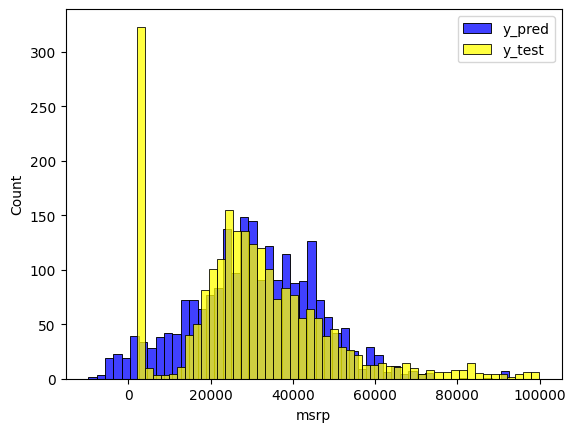

In [41]:
import seaborn as sns
sns.histplot(y_pred_test, bins = 50, color='blue', label='y_pred')
sns.histplot(y_test, bins = 50, color='yellow', label='y_test')
plt.xlabel('msrp')
plt.legend()
plt.show()

## 2.12 Categorical variables

In [42]:
df_new = df.copy(deep = True)

In [43]:
df_new.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,car_age
0,bmw,1 series m,2011,premium unleaded (required),335.0,6.0,manual,rear wheel drive,2.0,"factory tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,6
1,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650,6
2,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350,6
3,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450,6
4,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,luxury,compact,convertible,28,18,3916,34500,6


In [44]:
(
  df_new
 .select_dtypes(include = 'object')
 .nunique()
)

make                  40
model                821
engine_fuel_type      10
transmission_type      5
driven_wheels          4
market_category       62
vehicle_size           3
vehicle_style         16
dtype: int64

In [45]:
categorical_variables =df.columns[df.dtypes == 'object']
categorical_variables

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [46]:
for col_name in df_new[categorical_variables]:

  # Get top 5 most frequent values in the column
  col_values = df[col_name].value_counts().nlargest(5).index

  # Create a new column for each of the top 5 values
  for i in col_values:
        # Use np.where to assign 1 if the value matches, otherwise 0
        df_new[f'{col_name}_{i}'] = np.where(df_new[col_name] == i, 1, 0)


df_new.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,...,"market_category_luxury,performance",market_category_hatchback,vehicle_size_compact,vehicle_size_midsize,vehicle_size_large,vehicle_style_sedan,vehicle_style_4dr suv,vehicle_style_coupe,vehicle_style_4dr hatchback,vehicle_style_crew cab pickup
0,bmw,1 series m,2011,premium unleaded (required),335.0,6.0,manual,rear wheel drive,2.0,"factory tuner,luxury,high-performance",...,0,0,1,0,0,0,0,1,0,0
1,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",...,1,0,1,0,0,0,0,0,0,0
2,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,high-performance",...,0,0,1,0,0,0,0,1,0,0
3,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",...,1,0,1,0,0,0,0,1,0,0
4,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,luxury,...,0,0,1,0,0,0,0,0,0,0


In [47]:
df_new.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp', 'car_age',
       'make_chevrolet', 'make_ford', 'make_volkswagen', 'make_toyota',
       'make_dodge', 'model_silverado 1500', 'model_tundra', 'model_f-150',
       'model_sierra 1500', 'model_beetle convertible',
       'engine_fuel_type_regular unleaded',
       'engine_fuel_type_premium unleaded (recommended)',
       'engine_fuel_type_premium unleaded (required)',
       'engine_fuel_type_flex-fuel (unleaded/e85)', 'engine_fuel_type_diesel',
       'transmission_type_automatic', 'transmission_type_manual',
       'transmission_type_automated_manual', 'transmission_type_direct_drive',
       'transmission_type_unknown', 'driven_wheels_front wheel drive',
       'driven_wheels_rear wheel drive', 'driven_wheels_all wheel dri

In [48]:
df_new.drop(categorical_variables, axis=1, inplace=True)
df_new.drop('year', axis = 1, inplace = True)
df_new.head()


,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,car_age,make_chevrolet,make_ford,...,"market_category_luxury,performance",market_category_hatchback,vehicle_size_compact,vehicle_size_midsize,vehicle_size_large,vehicle_style_sedan,vehicle_style_4dr suv,vehicle_style_coupe,vehicle_style_4dr hatchback,vehicle_style_crew cab pickup
0,335.0,6.0,2.0,26,19,3916,46135,6,0,0,...,0,0,1,0,0,0,0,1,0,0
1,300.0,6.0,2.0,28,19,3916,40650,6,0,0,...,1,0,1,0,0,0,0,0,0,0
2,300.0,6.0,2.0,28,20,3916,36350,6,0,0,...,0,0,1,0,0,0,0,1,0,0
3,230.0,6.0,2.0,28,18,3916,29450,6,0,0,...,1,0,1,0,0,0,0,1,0,0
4,230.0,6.0,2.0,28,18,3916,34500,6,0,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
#split the dataframe
def split_dataframe(df):
    df_train = df.sample(frac=0.6, random_state=42)
    remaining_df = df.drop(df_train.index)

    df_val = remaining_df.sample(frac=0.5, random_state=42)
    df_test = remaining_df.drop(df_val.index)

    return df_train, df_val, df_test


df_train,df_val,df_test = split_dataframe(df_new)
print(f"Train shape: {df_train.shape}, Validation shape: {df_val.shape}, Test shape: {df_test.shape}")

# Train on df_train
X_train, y_train = preprae_X_y(df_train)
X_train_data = add_bias(X_train)
w,w0 = linear_regression_model(X_train_data, y_train)  # Train the model

# Predict on df_val
X_val, y_val = preprae_X_y(df_val)
X_val_data = add_bias(X_val)
y_pred_val = np.dot(X_val_data, w)

# Calculate RMSE for validation
rmse_val = rmse(y_pred_val, y_val)

# Predict on df_test
X_test, y_test = preprae_X_y(df_test)
X_test_data = add_bias(X_test)
y_pred_test = np.dot(X_test_data, w)

# Calculate RMSE for test
rmse_test = rmse(y_pred_test, y_test)

print(f"RMSE on validation set: {rmse_val.round(2)}")
print(f"RMSE on test set: {rmse_test.round(2)}")

Train shape: (6766, 45), Validation shape: (2255, 45), Test shape: (2255, 45)
RMSE on validation set: 1003957.79
RMSE on test set: 1004609.8


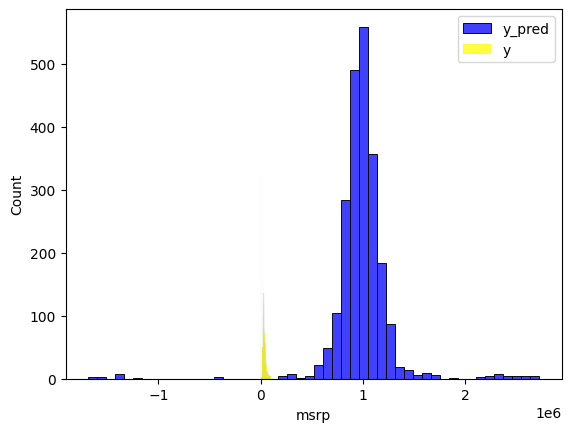

In [50]:
import seaborn as sns
sns.histplot(y_pred_test, bins = 50, color='blue', label='y_pred')
sns.histplot(y_test, bins = 50, color='yellow', label='y')
plt.xlabel('msrp')
plt.legend()
plt.show()

## 2.13 Regulization linear model

In [51]:
def linear_regression_model_regularized(X,y,r = 0.001):
  Xt = np.transpose(X)
  XtX = np.dot(Xt,X)
  XtX = XtX + r * np.eye(XtX.shape[0])
  XtX_inv = np.linalg.inv(XtX)
  XtX_inv_Xt = np.dot(XtX_inv,Xt)
  w = np.dot(XtX_inv_Xt,y)
  return w


In [52]:
#split the dataframe
def split_dataframe(df_new):
    df_train = df.sample(frac=0.6, random_state=42)
    remaining_df = df.drop(df_train.index)

    df_val = remaining_df.sample(frac=0.5, random_state=42)
    df_test = remaining_df.drop(df_val.index)

    return df_train, df_val, df_test


df_train,df_val,df_test = split_dataframe(df_new)
print(f"Train shape: {df_train.shape}, Validation shape: {df_val.shape}, Test shape: {df_test.shape}")

# Train on df_train
X_train, y_train = preprae_X_y(df_train)
X_train_data = add_bias(X_train)
w = linear_regression_model_regularized(X_train_data, y_train,r = 0.003)  # Train the model

# Predict on df_val
X_val, y_val = preprae_X_y(df_val)
X_val_data = add_bias(X_val)
y_pred_val = np.dot(X_val_data, w)

# Calculate RMSE for validation
rmse_val = rmse(y_pred_val, y_val)

# Predict on df_test
X_test, y_test = preprae_X_y(df_test)
X_test_data = add_bias(X_test)
y_pred_test = np.dot(X_test_data, w)

# Calculate RMSE for test
rmse_test = rmse(y_pred_test, y_test)

print(f"RMSE on validation set: {rmse_val.round(2)}")
print(f"RMSE on test set: {rmse_test.round(2)}")

Train shape: (6766, 17), Validation shape: (2255, 17), Test shape: (2255, 17)
RMSE on validation set: 10190.68
RMSE on test set: 10137.63


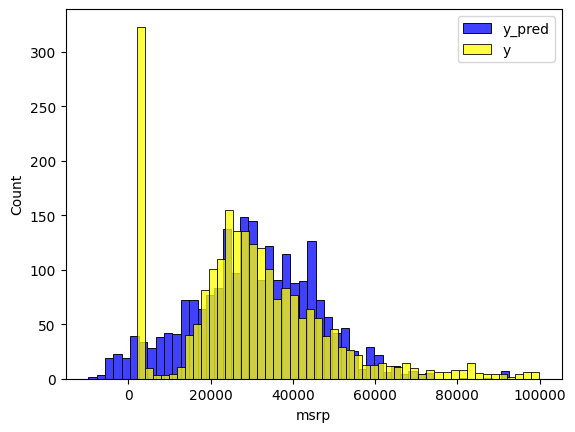

In [53]:
import seaborn as sns
sns.histplot(y_pred_test, bins = 50, color='blue', label='y_pred')
sns.histplot(y_test, bins = 50, color='yellow', label='y')
plt.xlabel('msrp')
plt.legend()
plt.show()

## 2.14 Tunning the model / linear model optimization

In [54]:
alpha = [0.0, 0.0001, 0.0002, 0.005, 0.01, 0.1 ,10,100,10000000]

for i in alpha:
  w = linear_regression_model_regularized(X_train_data, y_train,r = i)  # Train the model
  X_val, y_val = preprae_X_y(df_val)
  X_val_data = add_bias(X_val)
  y_pred_val = np.dot(X_val_data, w)

  # Calculate RMSE for validation
  score = rmse(y_pred_val, y_val)
  print(f'regularization_value: {i}, rmse_val: {int(score)}' )



regularization_value: 0.0, rmse_val: 22975
regularization_value: 0.0001, rmse_val: 10190
regularization_value: 0.0002, rmse_val: 10190
regularization_value: 0.005, rmse_val: 10190
regularization_value: 0.01, rmse_val: 10190
regularization_value: 0.1, rmse_val: 10190
regularization_value: 10, rmse_val: 10190
regularization_value: 100, rmse_val: 10190
regularization_value: 10000000, rmse_val: 12656


In [55]:
#split the dataframe
def split_dataframe(df_new):
    df_train = df.sample(frac=0.6, random_state=42)
    remaining_df = df.drop(df_train.index)

    df_val = remaining_df.sample(frac=0.5, random_state=42)
    df_test = remaining_df.drop(df_val.index)

    return df_train, df_val, df_test


df_train,df_val,df_test = split_dataframe(df_new)
print(f"Train shape: {df_train.shape}, Validation shape: {df_val.shape}, Test shape: {df_test.shape}")

# Train on df_train
X_train, y_train = preprae_X_y(df_train)
X_train_data = add_bias(X_train)
w = linear_regression_model_regularized(X_train_data, y_train,r = 10000)  # best alpha value subsituted

# Predict on df_val
X_val, y_val = preprae_X_y(df_val)
X_val_data = add_bias(X_val)
y_pred_val = np.dot(X_val_data, w)

# Calculate RMSE for validation
rmse_val = rmse(y_pred_val, y_val)

# Predict on df_test
X_test, y_test = preprae_X_y(df_test)
X_test_data = add_bias(X_test)
y_pred_test = np.dot(X_test_data, w)

# Calculate RMSE for test
rmse_test = rmse(y_pred_test, y_test)

print(f"RMSE on validation set: {rmse_val.round(2)}")
print(f"RMSE on test set: {rmse_test.round(2)}")

Train shape: (6766, 17), Validation shape: (2255, 17), Test shape: (2255, 17)
RMSE on validation set: 10186.68
RMSE on test set: 10150.47


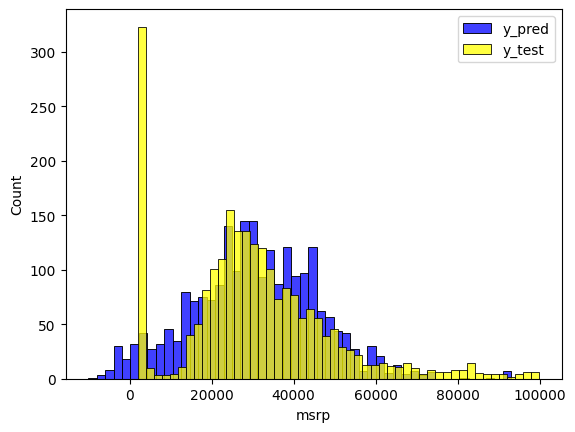

In [56]:
import seaborn as sns
sns.histplot(y_pred_test, bins = 50, color='blue', label='y_pred')
sns.histplot(y_test, bins = 50, color='yellow', label='y_test')
plt.xlabel('msrp')
plt.legend()
plt.show()

## 2.15 Using the model

In [76]:
car = df_test.iloc[200].to_dict()
car

{'make': 'gmc',
 'model': 'acadia',
 'year': 2016,
 'engine_fuel_type': 'regular unleaded',
 'engine_hp': 288.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front wheel drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover',
 'vehicle_size': 'midsize',
 'vehicle_style': '4dr suv',
 'highway_mpg': 22,
 'city_mpg': 15,
 'popularity': 549,
 'msrp': 47890,
 'car_age': 1}

In [77]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [78]:
X_train = prepare_X(df_train)
print(X_train.shape)
print(y_train.shape)
w, w0 = linear_regression_model(X_train, y_train)
print(w)
print(w0)

(6766, 5)
(6766,)
[ 2.02073598e+02 -3.74464982e+03 -5.27994541e+01  2.98130907e+02
 -3.47003564e-01]
202.07359757907722


In [83]:
X_test = prepare_X(pd.DataFrame([car]))[0]
y_pred = w0 + np.dot(X_test,w)

print('X_test: ',X_test)
print('predicted car price: ',y_pred)
print(f'original car price: {car.get("msrp")}')
print('')



X_test:  [288.   6.  22.  15. 549.]
predicted car price:  39051.241439133446
original car price: 47890

